## Cancer Classification 

### Problem Statement

A health facility has been experiencing a lot of death due to cancer with a few survivors. They are looking for ways to integrate ML to their systems to help them catch cancerous cells and detect if it is benign / malignant.


### Approach

- Examine the possibility of predicting malignity of cancer by building a classification model using past data.

- The model should be able to correctly predict malignant cases. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

c:\Users\aaginam\AppData\Local\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
df = pd.read_csv('cancer dataset.csv', sep=';')

#### Data Profiling

In [4]:
df.head()

,clump,ucellsize,ucellshape,mgadhesion,sepics,bnuclei,bchromatin,normnucl,mitoses,classe
0,4,1,1,1,2,3,1,1,1,begnin
1,1,5,8,6,5,8,7,10,1,malignant
2,3,2,2,3,2,1,1,1,1,begnin
3,3,1,1,3,8,1,5,8,1,begnin
4,10,4,6,1,2,10,5,3,1,malignant


In [5]:
df.columns

Index(['clump', 'ucellsize', 'ucellshape', 'mgadhesion', 'sepics', 'bnuclei',
       'bchromatin', 'normnucl', 'mitoses', 'classe'],
      dtype='object')

Here is a data dictionary for the given columns. The descriptions are based on commonly used features in medical datasets, particularly those related to breast cancer diagnostics (e.g., the Wisconsin Breast Cancer Dataset):

| **Column Name** | **Description**                                                                                 |
|------------------|-----------------------------------------------------------------------------------------------|
| **clump**        | The clump thickness observed in a sample, measuring the size and cohesion of cell clusters.   |
| **ucellsize**    | Uniformity of cell size, indicating how similar the sizes of cells are within the sample.      |
| **ucellshape**   | Uniformity of cell shape, measuring how consistent the shapes of cells are in the sample.      |
| **mgadhesion**   | Marginal adhesion, representing how well cells stick to one another.                          |
| **sepics**       | Single epithelial cell size, indicating the size of individual epithelial cells.              |
| **bnuclei**      | Bare nuclei count, representing the number of nuclei in cells that lack cytoplasm.            |
| **bchromatin**   | Bland chromatin, measuring the texture or consistency of the chromatin in cell nuclei.         |
| **normnucl**     | Normal nucleoli, indicating the number of normal, small, round structures within the nuclei.   |
| **mitoses**      | Mitoses rate, measuring the frequency of cell division in the sample.                         |
| **classe**       | The class of the sample, typically indicating benign (0) or malignant (1) status.             |

### Notes:
- **`clump`, `ucellsize`, `ucellshape`**: Often used to measure abnormalities in cell size and formation.
- **`mgadhesion`, `sepics`, `bnuclei`**: These features assess structural and cellular-level adhesion and size variations.
- **`bchromatin`, `normnucl`, `mitoses`**: These focus on nuclear characteristics, which are critical in identifying cancerous changes.
- **`classe`**: Typically used as the target variable for classification, with binary outcomes.

In [6]:
df.shape

(300, 10)

There are 9 possible features/inputs

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   clump       300 non-null    int64 
 1   ucellsize   300 non-null    int64 
 2   ucellshape  300 non-null    int64 
 3   mgadhesion  300 non-null    int64 
 4   sepics      300 non-null    int64 
 5   bnuclei     300 non-null    int64 
 6   bchromatin  300 non-null    int64 
 7   normnucl    300 non-null    int64 
 8   mitoses     300 non-null    int64 
 9   classe      300 non-null    object
dtypes: int64(9), object(1)
memory usage: 23.6+ KB


#### Data Cleaning

In [8]:
df.isnull().sum()

clump         0
ucellsize     0
ucellshape    0
mgadhesion    0
sepics        0
bnuclei       0
bchromatin    0
normnucl      0
mitoses       0
classe        0
dtype: int64

In [9]:
df.duplicated().sum()

88

In [10]:
# class imbalance

df.classe.value_counts()

classe
begnin       199
malignant    101
Name: count, dtype: int64

#### Feature Selection

In [11]:
X = df.drop('classe', axis=1) # features
y = df.classe # outcome/label

In [12]:
X.head()

,clump,ucellsize,ucellshape,mgadhesion,sepics,bnuclei,bchromatin,normnucl,mitoses
0,4,1,1,1,2,3,1,1,1
1,1,5,8,6,5,8,7,10,1
2,3,2,2,3,2,1,1,1,1
3,3,1,1,3,8,1,5,8,1
4,10,4,6,1,2,10,5,3,1


In [13]:
X.describe()

,clump,ucellsize,ucellshape,mgadhesion,sepics,bnuclei,bchromatin,normnucl,mitoses
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,4.436667,3.053333,3.216667,2.653333,3.236667,3.470000,3.360000,2.860000,1.616667
std,2.820017,2.997851,3.008859,2.710037,2.205342,3.561561,2.404789,3.114386,1.800146
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,6.000000,5.000000,5.000000,3.000000,4.000000,5.000000,4.000000,3.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


<Axes: >

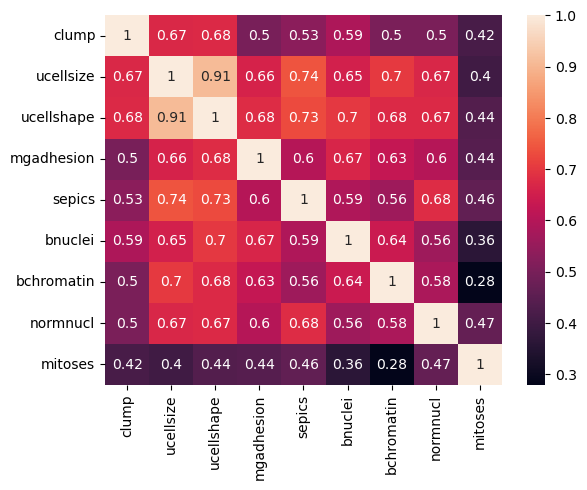

In [14]:
import seaborn as sb

sb.heatmap(X.corr(), annot=True)

The features that do not show high correlation : bchromatin, mitoses, bnuclei, normnuclei

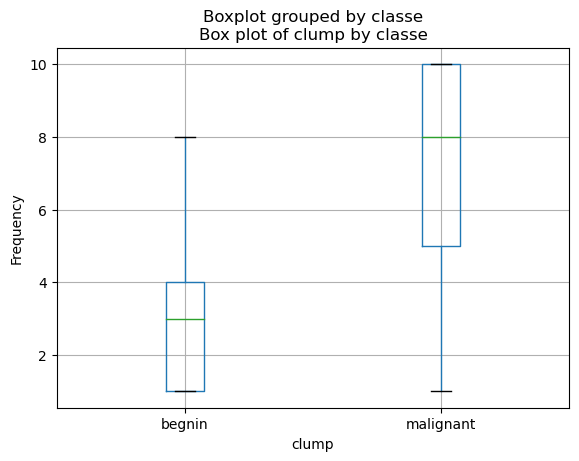

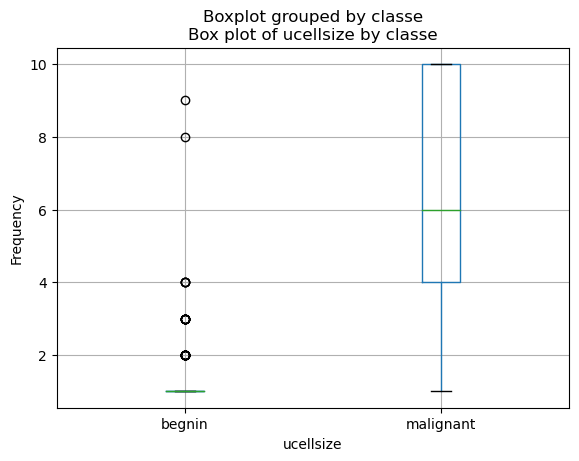

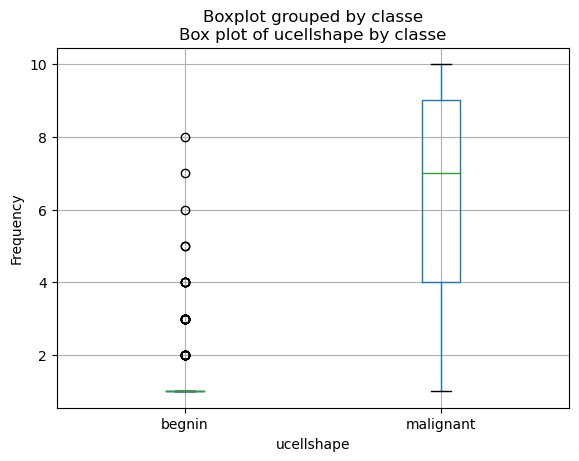

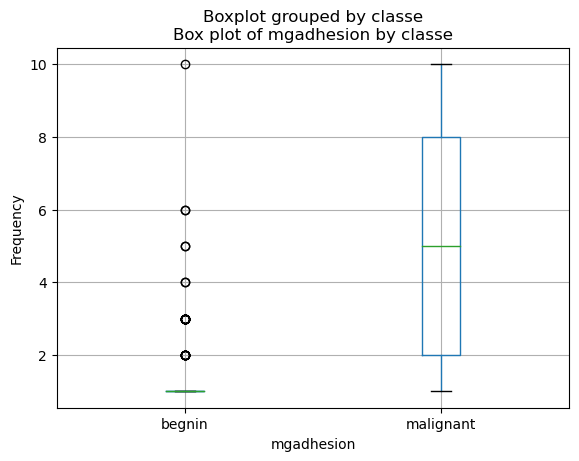

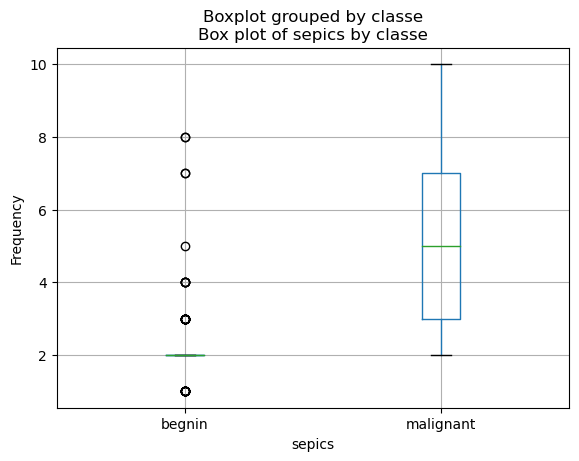

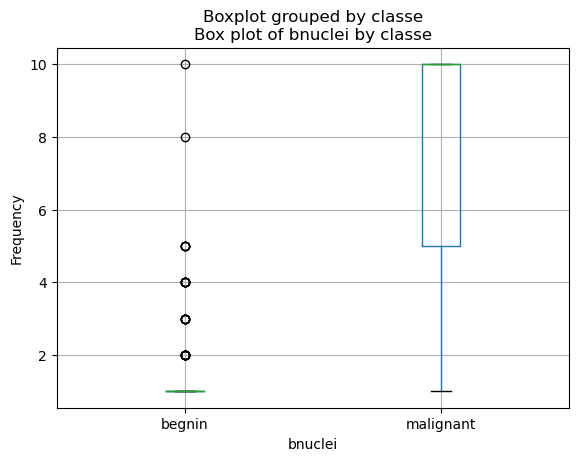

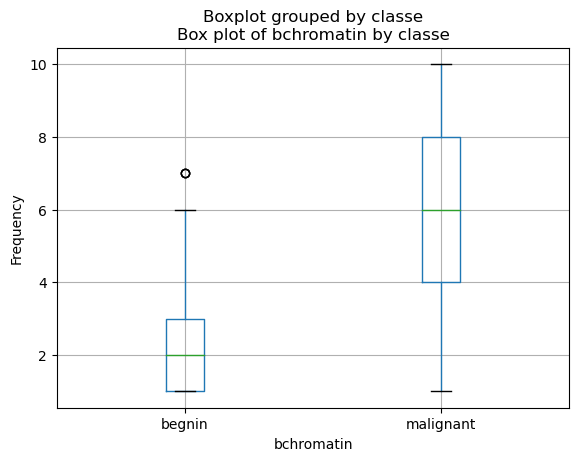

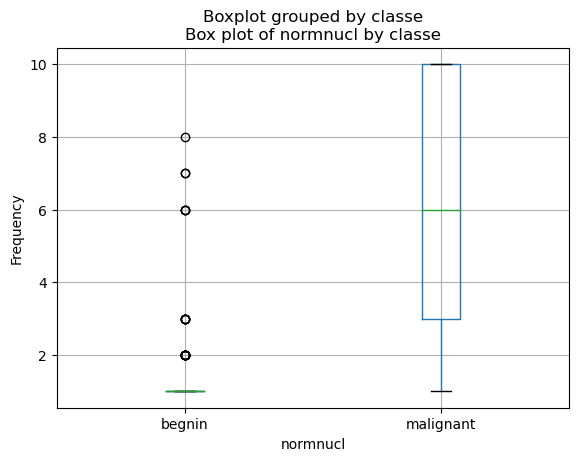

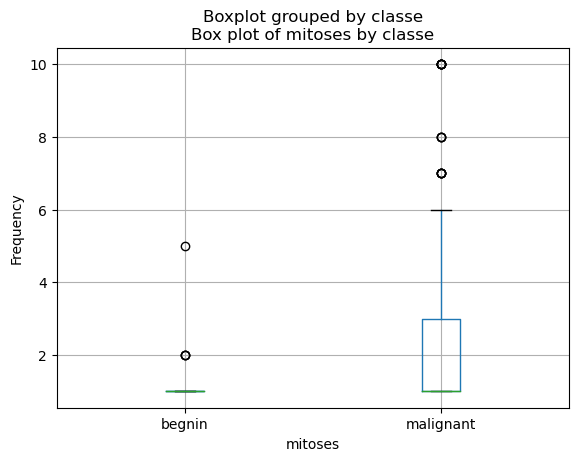

In [15]:
for column in X.columns:
    df.boxplot(column=column, by='classe')
    plt.title(f'Box plot of {column} by classe')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

The features - mitoses, normnuclei, bnuclei, mgadhesion, ucellshape and ucellsize

In [16]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

fs = SelectKBest(score_func=f_classif, k=5)
X_selected = fs.fit_transform(X,y)

In [17]:
cols_id = fs.get_support()
cols_id

array([ True,  True,  True, False, False,  True,  True, False, False])

In [18]:
X.columns

Index(['clump', 'ucellsize', 'ucellshape', 'mgadhesion', 'sepics', 'bnuclei',
       'bchromatin', 'normnucl', 'mitoses'],
      dtype='object')

In [19]:
# label enconding

df['classe'] = df['classe'].replace({'begnin': 0, 'malignant': 1})

y = df.classe

y

C:\Users\aaginam\AppData\Local\Temp\ipykernel_15180\1360012371.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['classe'] = df['classe'].replace({'begnin': 0, 'malignant': 1})


0      0
1      1
2      0
3      0
4      1
      ..
295    0
296    0
297    0
298    1
299    0
Name: classe, Length: 300, dtype: int64

Columns Selected : clump, ucellsize, ucellshape, bnuclei, bchromatin

#### Model Building

In [20]:
# Split the data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=46)

In [21]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression

model_log = LogisticRegression()

model_log.fit(X_train, y_train)

LogisticRegression()

In [22]:
# Evaluation

predictions = model_log.predict(X_test)
predictions

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1], dtype=int64)

In [23]:
from sklearn.metrics import accuracy_score

print(f'Accuracy score {accuracy_score(y_test, predictions)}')

Accuracy score 0.9833333333333333


In [25]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        41
           1       1.00      0.95      0.97        19

    accuracy                           0.98        60
   macro avg       0.99      0.97      0.98        60
weighted avg       0.98      0.98      0.98        60



 metrics 

- Precision : accuracy of predictions (negative or positive)
- recall : how many instances of the class is correctly predicted. 
- f1score : combines precision and recall.
- support : number of instances

<Axes: xlabel='Predicted', ylabel='Actual'>

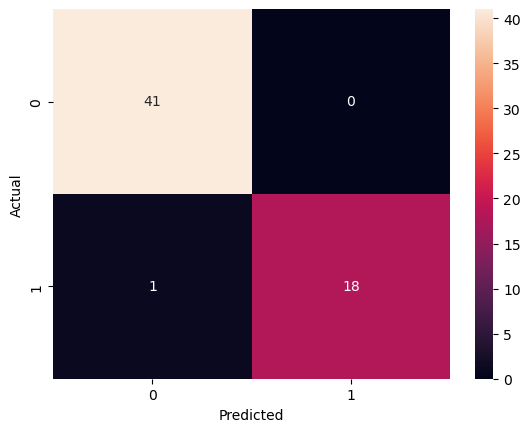

In [27]:
conf_matrix  = pd.crosstab(y_test, predictions, rownames=['Actual'], colnames=['Predicted'])

sb.heatmap(conf_matrix, annot=True)

- decision tree

- knn

- random forest